<a href="https://colab.research.google.com/github/yongtaoliu/Decoding-the-shift-invariant-data/blob/main/Decoding_the_shift_invariant_data_Notebook_2_applications_for_scanning_probe_microscopy_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Decoding the shift-invariant data--Notebook 2: applications for scanning probe microscopy data**

April 17, 2021

- Project lead by [Sergei V. Kalinin](https://scholar.google.com/citations?hl=en&user=-cuxoSQAAAAJ&view_op=list_works&sortby=pubdate)
- VAE and shift-VAE workflow by [Sergei V. Kalinin](https://scholar.google.com/citations?hl=en&user=-cuxoSQAAAAJ&view_op=list_works&sortby=pubdate)
- VAE and shift-VAE realized via pyroVED by [Maxim Ziatdinov](https://scholar.google.com/citations?user=YnSdOoUAAAAJ&hl=en)



- Detailed analyses by [Yongtao Liu](https://scholar.google.com/citations?user=V9FMPgQAAAAJ&hl=en) (Funding: EFRC Award Number DE-SC0021118)
- BFO sample by Yogesh Sharma and BFO BEPFM measurement by Dohyung Kim
- BEPS PTO data by [Kyle Kylley](https://scholar.google.com/citations?user=52OuP94AAAAJ&hl=en&oi=ao)/[Rama K. Vasudevan](https://scholar.google.com/citations?user=b2XP9A4AAAAJ&hl=en). Note that this BEPS is from our previous publication [Kalinin, Sergei V., et al. ACS Applied Materials & Interfaces 13.1 (2021): 1693-1703.](https://pubs.acs.org/doi/abs/10.1021/acsami.0c15085), here we just use this data as a model system for analysis.



**Comment**
- Ask for CNMS proposal for shift VAE

**Notebook Package Version**
- torch version: 1.8.0+cu101; 
- matplotlib: 3.2.2
- pyroved: 0.1.1
- sklearn: 0.22.2.post1
- numpy: 1.19.5
- pyUSID: 0.0.10
- h5py: 2.10.0
- lmfit: 1.0.2

# Install and Import


*   Install pyroved for shift-vae
*   Install lmfit for spectra fitting
*   Install pycroscopy for band excitation data analysis
*   Import other necessary packages





In [ ]:
pip install pyroved==0.1.1

     |████████████████████████████████| 634kB 7.5MB/s 


In [ ]:
pip install lmfit==1.0.2

     |████████████████████████████████| 307kB 5.8MB/s 
     |████████████████████████████████| 61kB 3.7MB/s 
     |████████████████████████████████| 256kB 7.7MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.2-cp37-none-any.whl size=85265 sha256=48e9ffb9419c75b50658c5fa74078a2751fe35539db821e058c716e3dddc086c
  Stored in directory: /root/.cache/pip/wheels/d4/5e/db/d9f5987d9f15bf910feb5e0274ac601d5f2161dc78aedfacfa
  Created wheel for asteval: filename=asteval-0.9.23-cp37-none-any.whl size=17419 sha256=ba5f08869ea7907b29bb53651ae100c7ef8cc109fac8e910766b09ee216f7f15
  Stored in directory: /root/.cache/pip/wheels/56/d6/43/4b5d8a9fd98b976031768673658c8b8d08dc9dcc0fa1907ad0
Successfully built lmfit asteval


In [ ]:
pip install pycroscopy

     |████████████████████████████████| 358kB 6.0MB/s 
     |████████████████████████████████| 61kB 4.6MB/s 
     |████████████████████████████████| 788kB 7.3MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 81kB 6.6MB/s 
     |████████████████████████████████| 368kB 12.0MB/s 
     |████████████████████████████████| 481kB 17.3MB/s 
  Created wheel for numpy-groupies: filename=numpy_groupies-0.9.7-cp37-none-any.whl size=21327 sha256=e9c70864824c123ccdc1f8391f1839db2a6af15527e7de9005dd4118bf655199
  Stored in directory: /root/.cache/pip/wheels/9e/19/02/30e0a1918ddc498ccdd5dab91b3bfce6100bfd0d416db622c9
  Created wheel for igor: filename=igor-0.3-cp37-none-any.whl size=52098 sha256=7e1ab1446ddf406bae2a8006e026df7e908917fe06baf3487c17dcfe08d849a9
  Stored in directory: /root/.cache/pip/wheels/ff/a8/3f/95f6abe6d9e85627b7504d0fde2f9270a33d82b19885493e51
  Created wheel for cytoolz: filename=cytoolz-0.11.0-cp37-cp37m-linux_x86_64.whl size=1223

In [ ]:
import pyroved as pv
import torch
import matplotlib.pyplot as plt

from sklearn import decomposition
import numpy as np
import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt
from numpy import exp, pi, sqrt
from lmfit import Model

import pyUSID as usid
import h5py
import math
import torch

import seaborn as sns
import pandas as pd

from matplotlib import cm

# **Analysis of BE-PFM BFO data**


*   Here, we extend the VAE and shift-VAE analyses to experimental data: band excitation piezoresponse force microscopy (BEPFM) data of Bismuth ferrite (BFO)



Download BEPFM data

In [ ]:
#This is the data for the BFO
!gdown https://drive.google.com/uc?id=1jPSFqJTiDg-RtuZthcC4h-_wH8PPPuO4

Downloading...
From: https://drive.google.com/uc?id=1jPSFqJTiDg-RtuZthcC4h-_wH8PPPuO4
To: /content/BE_PFM_BFO crystal 2.h5
72.8MB [00:00, 232MB/s]


Read BEPFM data

In [ ]:
h5_f = h5py.File(r'/content/BE_PFM_BFO crystal 2.h5', 'r+') 

Show the data structure

In [ ]:
usid.hdf_utils.print_tree(h5_f)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Raw_Data-SHO_Fit_000
      --------------------
      ├ Guess
      ├ Spectroscopic_Indices
      ├ Spectroscopic_Values
    ├ Raw_Data-SHO_Fit_001
      --------------------
      ├ Fit
      ├ Guess
      ├ Spectroscopic_Indices
      ├ Spectroscopic_Values
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Mean_Spectrogram
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices


## Show PFM images and BE spectra

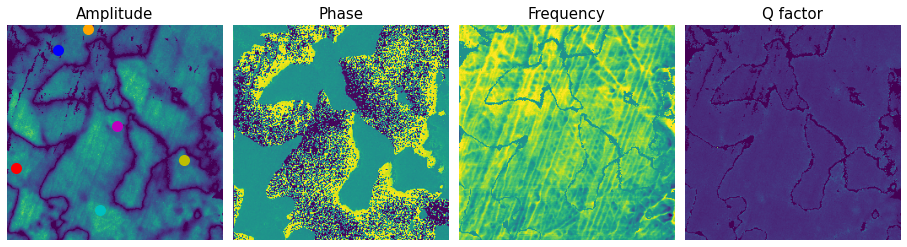

In [ ]:
amp = h5_f['Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Guess']['Amplitude [V]'].reshape(256,256)
pha = h5_f['Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Guess']['Phase [rad]'].reshape(256,256)
fre = h5_f['Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Guess']['Frequency [Hz]'].reshape(256,256)
q = h5_f['Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Guess']['Quality Factor'].reshape(256,256)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (16, 4))
ax1.imshow(amp)
ax1.set_title('Amplitude', fontsize = 15)
ax1.axis('off')

i1 = 10; j1 = 170
i2 = 60; j2 = 30
i3 = 210; j3 = 160
i4 = 110; j4 = 220
i5 = 130; j5 = 120
i6 = 96; j6 = 5

ax1.scatter(i1,j1, s = 100, c = 'r')
ax1.scatter(i2,j2, s = 100, c = 'b')
ax1.scatter(i3,j3, s = 100, c = 'y')
ax1.scatter(i4,j4, s = 100, c = 'c')
ax1.scatter(i5,j5, s = 100, c = 'm')
ax1.scatter(i6,j6, s = 100, c = 'orange')

ax2.imshow(pha)
ax2.set_title('Phase', fontsize = 15)
ax2.axis('off')
ax3.imshow(fre)
ax3.set_title('Frequency', fontsize = 15)
ax3.axis('off')
ax4.imshow(q)
ax4.set_title('Q factor', fontsize = 15)
ax4.axis('off')

plt.subplots_adjust(wspace=0.05)

Show representative BE spectra from the spots labelled in the amplitude image

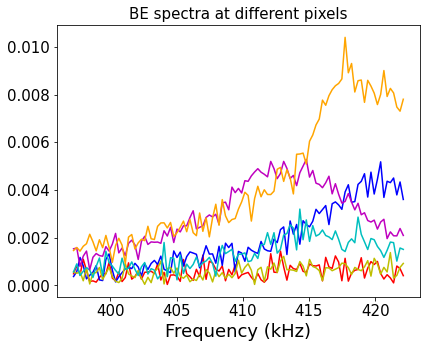

In [ ]:
#plot BE spectra vs resonance frequency
spec = np.abs(np.array(h5_f['Measurement_000/Channel_000/Raw_Data']))    #read BE spectra
freq = h5_f['Measurement_000/Channel_000/Spectroscopic_Values']          #read resonance frequency

#convert the spec as a map fashion
spec_map = spec.reshape(256,256,103)

#then plot the spectra corresponding to the spots labeled in above amplitude image
f, ax = plt.subplots(figsize = (6.5,5))
ax.plot (freq[0,]/1000, spec_map[i1, j1], c = 'r')
ax.plot (freq[0,]/1000, spec_map[i2, j2], c = 'b')
ax.plot (freq[0,]/1000, spec_map[i3, j3], c = 'y')
ax.plot (freq[0,]/1000, spec_map[i4, j4], c = 'c')
ax.plot (freq[0,]/1000, spec_map[i5, j5], c = 'm')
ax.plot (freq[0,]/1000, spec_map[i6, j6], c = 'orange')

ax.set_xlabel('Frequency (kHz)', fontsize = 18)
ax.set_title('BE spectra at different pixels', fontsize = 15)
ax.tick_params(labelsize = 15)

# VAE analysis

Prepare train_data

In [ ]:
# Normalize spectra
spec = (spec-spec.min())/(spec.max()-spec.min())

# Convert numpy array to torch tensor
spec = torch.tensor(spec)

# Initialize dataloader
train_loader = pv.utils.init_dataloader(spec.unsqueeze(1), batch_size=64)

# Initialize dimension
in_dim = (103,)

## Regular VAE train


*   We do regular VAE analysis first
*   Since this training takes longer time, we provided a link to download trained weight in the second cell from here



Train

In [ ]:
# Initialize VAE
vae = pv.models.trVAE(in_dim, latent_dim=2, coord=0,
                      sampler_d="gaussian", decoder_sig=.1, sigmoid_d= False,
                      seed=0)

# Initialize SVI trainer
trainer = pv.trainers.SVItrainer(vae)

# Train for n epochs:
for e in range(200):
    trainer.step(train_loader)
    trainer.print_statistics()

vae_BEPFM = vae

Epoch: 1 Training loss: -125.0849
Epoch: 2 Training loss: -131.1660
Epoch: 3 Training loss: -131.3726
Epoch: 4 Training loss: -131.5528
Epoch: 5 Training loss: -131.6817
Epoch: 6 Training loss: -131.7674
Epoch: 7 Training loss: -131.8296
Epoch: 8 Training loss: -131.8895
Epoch: 9 Training loss: -131.9437
Epoch: 10 Training loss: -131.9884
Epoch: 11 Training loss: -132.0145
Epoch: 12 Training loss: -132.0115
Epoch: 13 Training loss: -132.0397
Epoch: 14 Training loss: -132.0738
Epoch: 15 Training loss: -132.0696
Epoch: 16 Training loss: -132.0736
Epoch: 17 Training loss: -132.1121
Epoch: 18 Training loss: -132.0906
Epoch: 19 Training loss: -132.1045
Epoch: 20 Training loss: -132.1269
Epoch: 21 Training loss: -132.1145
Epoch: 22 Training loss: -132.1309
Epoch: 23 Training loss: -132.1288
Epoch: 24 Training loss: -132.1295
Epoch: 25 Training loss: -132.1567
Epoch: 26 Training loss: -132.1410
Epoch: 27 Training loss: -132.1578
Epoch: 28 Training loss: -132.1471
Epoch: 29 Training loss: -132

Download and load trained weight

In [ ]:
!gdown https://drive.google.com/uc?id=1-423vPP8O9owAxW0qhtsQ-a-HJjvQcus

vae_BEPFM = pv.models.trVAE(in_dim, latent_dim=2, coord=0,
                      sampler_d="gaussian", decoder_sig=.1, sigmoid_d= False,
                      seed=0)

vae_BEPFM.load_weights("/content/v2_Shift_(ss)VAE_Analysis_1DSpectra&BEPFM&BEPS_vae_BEPFM_lt2.pt")

Downloading...
From: https://drive.google.com/uc?id=1-423vPP8O9owAxW0qhtsQ-a-HJjvQcus
To: /content/v2_Shift_(ss)VAE_Analysis_1DSpectra&BEPFM&BEPS_vae_BEPFM_lt2.pt
100% 247k/247k [00:00<00:00, 90.7MB/s]


Visualize VAE latent variables distribution

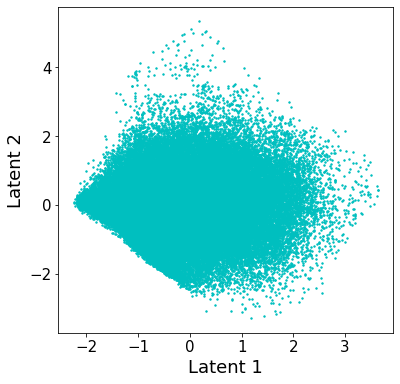

In [ ]:
z_mean, z_sd = vae_BEPFM.encode(spec) #VAE encode

#plot latent variables distribution
f, ax = plt.subplots(figsize = (6,6))
ax.scatter(z_mean[:, -2], z_mean[:, -1], s=2, c = 'c')
ax.set_xlabel('Latent 1', fontsize = 18)
ax.set_ylabel('Latent 2', fontsize = 18)
ax.tick_params(labelsize = 15)
plt.show()

## shift-VAE train

*   We do shift-VAE analysis now
*   Since this training takes longer time, we provided a link to download trained weights in the second cell from here




Train

In [ ]:
# Initialize shift-invariant VAE
svae = pv.models.trVAE(in_dim, latent_dim=2, coord=1,
                      sampler_d="gaussian", decoder_sig=.1, sigmoid_d=False,
                      seed= 0)

# Initialize SVI trainer
trainer = pv.trainers.SVItrainer(svae)

# Train for n epochs:
for e in range(200):
    trainer.step(train_loader)
    trainer.print_statistics()

svae_BEPFM = svae

Epoch: 1 Training loss: -121.6089
Epoch: 2 Training loss: -130.6299
Epoch: 3 Training loss: -130.8625
Epoch: 4 Training loss: -130.9556
Epoch: 5 Training loss: -130.9990
Epoch: 6 Training loss: -131.1298
Epoch: 7 Training loss: -131.1462
Epoch: 8 Training loss: -131.1747
Epoch: 9 Training loss: -131.2351
Epoch: 10 Training loss: -131.2540
Epoch: 11 Training loss: -131.2716
Epoch: 12 Training loss: -131.2711
Epoch: 13 Training loss: -131.3160
Epoch: 14 Training loss: -131.2885
Epoch: 15 Training loss: -131.3263
Epoch: 16 Training loss: -131.3196
Epoch: 17 Training loss: -131.3367
Epoch: 18 Training loss: -131.3411
Epoch: 19 Training loss: -131.3559
Epoch: 20 Training loss: -131.3425
Epoch: 21 Training loss: -131.3445
Epoch: 22 Training loss: -131.3634
Epoch: 23 Training loss: -131.3830
Epoch: 24 Training loss: -131.3622
Epoch: 25 Training loss: -131.3804
Epoch: 26 Training loss: -131.3910
Epoch: 27 Training loss: -131.3943
Epoch: 28 Training loss: -131.3878
Epoch: 29 Training loss: -131

Download and load trained weights

In [ ]:
!gdown https://drive.google.com/uc?id=1-7LvpApUWWAPoDuyxV1nwbKsoNjzZ7qX

svae_BEPFM = pv.models.trVAE(in_dim, latent_dim=2, coord=1,
                      sampler_d="gaussian", decoder_sig=.1, sigmoid_d= False,
                      seed=0)

svae_BEPFM.load_weights("/content/v2_Shift_(ss)VAE_Analysis_1DSpectra&BEPFM&BEPS_svae_BEPFM_lt2.pt")

Downloading...
From: https://drive.google.com/uc?id=1-7LvpApUWWAPoDuyxV1nwbKsoNjzZ7qX
To: /content/v2_Shift_(ss)VAE_Analysis_1DSpectra&BEPFM&BEPS_svae_BEPFM_lt2.pt
100% 264k/264k [00:00<00:00, 93.9MB/s]


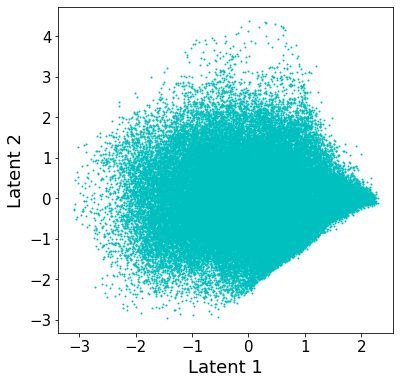

In [ ]:
z_mean, z_sd = svae_BEPFM.encode(spec)  #shift-VAE encode

#plot shift-VAE latent variables distribution
f, ax = plt.subplots(figsize = (6,6))
ax.scatter(z_mean[:, -2], z_mean[:, -1], s=1, c = 'c')
ax.set_xlabel('Latent 1', fontsize = 18)
ax.set_ylabel('Latent 2', fontsize = 18)
ax.tick_params(labelsize = 15)
plt.show()

## Plot Latent Variables as Images


*   Here, we shape the latent variables to images, so as to see if the latent variables are related to features in the image, such as ferroelectric domains



VAE latent variable images

(-0.5, 255.5, 255.5, -0.5)

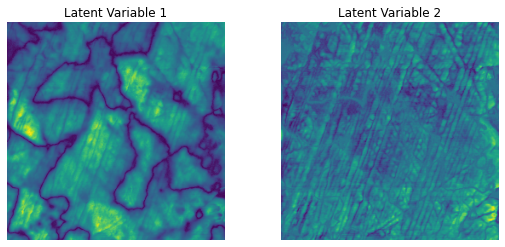

In [ ]:
#vae latent variable
z_mean, _ = vae_BEPFM.encode(spec)

#reshape latent variables to image size
vae_im1 = np.array (z_mean[:, 0]).reshape(256,256) 
vae_im2 = np.array (z_mean[:, 1]).reshape(256,256)

#show latent variables images
f, (ax1, ax2) = plt.subplots(1,2,figsize = (9,4))
ax1.imshow(vae_im1)
ax1.set_title('Latent Variable 1')
ax1.axis ('off')
ax2.imshow(vae_im2)
ax2.set_title('Latent Variable 2')
ax2.axis ('off')

Shift-VAE latent variable images

(-0.5, 255.5, 255.5, -0.5)

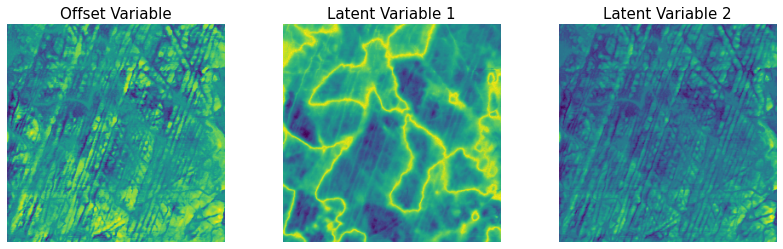

In [ ]:
# shift-vae latent variable
z_mean, _ = svae_BEPFM.encode(spec)

#reshape latent variabes to image size
svae_im0 = np.array (z_mean[:, 0]).reshape(256,256)
svae_im1 = np.array (z_mean[:, 1]).reshape(256,256)
svae_im2 = np.array (z_mean[:, 2]).reshape(256,256)

#plot latent variable images
f, (ax0, ax1, ax2) = plt.subplots(1,3,figsize = (14,4))
ax0.imshow(svae_im0)
ax0.set_title('Offset Variable', fontsize = 15)
ax0.axis ('off')
ax1.imshow(svae_im1)
ax1.set_title('Latent Variable 1', fontsize = 15)
ax1.axis ('off')
ax2.imshow(svae_im2)
ax2.set_title('Latent Variable 2', fontsize = 15)
ax2.axis ('off')

## VAE and shift-VAE Deocode


*   Here, we recontruct the BE spectra using trained models and corresponding latent variables



Randomly pick up three pixels to do decode

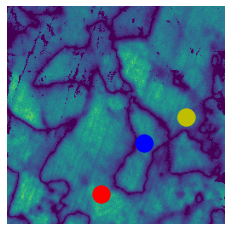

In [ ]:
i1 = 110; j1 = 220
i2 = 160; j2 = 160
i3 = 210; j3 = 130

f, ax = plt.subplots()
ax.imshow(amp)
ax.scatter(i1,j1, s = 300, c = 'r')
ax.axis('off')
ax.scatter(i2,j2, s = 300, c = 'b')
ax.scatter(i3,j3, s = 300, c = 'y')

Perform VAE and shift-VAE decode on the above three pixels

In [ ]:
#pixel 1
deco_svae = torch.tensor([svae_im1[i1,j1],svae_im2[i1,j1]])[None]
d1_svae=svae_BEPFM.decode(deco_svae).cpu()
deco_vae = torch.tensor([vae_im1[i1,j1],vae_im2[i1,j1]])[None]
d1_vae=vae_BEPFM.decode(deco_vae).cpu()

#pixel 2
deco_svae = torch.tensor([svae_im1[i2,j2],svae_im2[i2,j2]])[None]
d2_svae=svae_BEPFM.decode(deco_svae).cpu()
deco_vae = torch.tensor([vae_im1[i2,j2],vae_im2[i2,j2]])[None]
d2_vae=vae_BEPFM.decode(deco_vae).cpu()

#pixel 3
deco_svae = torch.tensor([svae_im1[i3,j3],svae_im2[i3,j3]])[None]
d3_svae=svae_BEPFM.decode(deco_svae).cpu()
deco_vae = torch.tensor([vae_im1[i3,j3],vae_im2[i3,j3]])[None]
d3_vae=vae_BEPFM.decode(deco_vae).cpu()

spec_map = spec.reshape(256,256,103)

Compare raw spectra, shfit-VAE reconstructed spectra, and VAE reconstructed spectra


*   Both shift-VAE and VAE show capability of denoising raw spectra



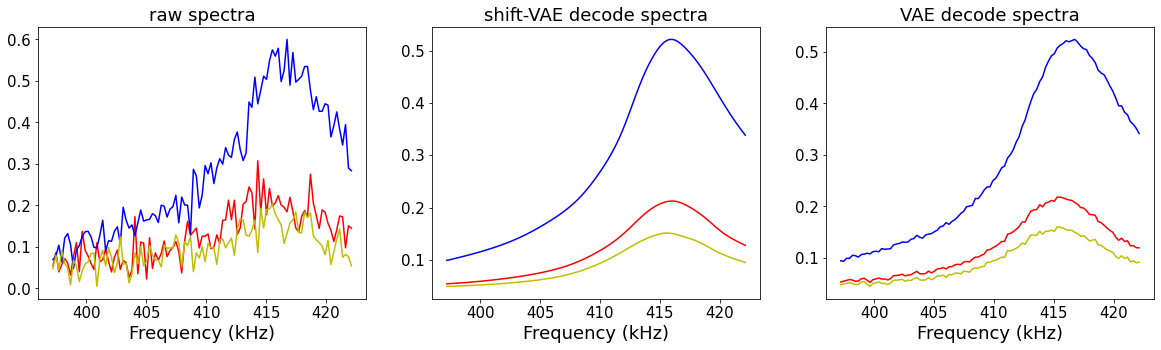

In [ ]:
f, (ax0, ax1, ax2) = plt.subplots(1,3,figsize = (20,5))
ax0.plot (freq[0,]/1000, spec_map[i1, j1], c = 'r')
ax0.plot (freq[0,]/1000, spec_map[i2, j2], c = 'b')
ax0.plot (freq[0,]/1000, spec_map[i3, j3], c = 'y')
ax0.set_xlabel('Frequency (kHz)', fontsize = 18)
ax0.set_title('raw spectra', fontsize = 18)
ax0.tick_params(labelsize = 15)

ax1.plot (freq[0,]/1000, d1_svae[0], c = 'r')
ax1.plot (freq[0,]/1000, d2_svae[0], c = 'b')
ax1.plot (freq[0,]/1000,d3_svae[0], c = 'y')
ax1.set_xlabel('Frequency (kHz)', fontsize = 18)
ax1.set_title('shift-VAE decode spectra', fontsize = 18)
ax1.tick_params(labelsize = 15)

ax2.plot (freq[0,]/1000, d1_vae[0], c = 'r')
ax2.plot (freq[0,]/1000, d2_vae[0], c = 'b')
ax2.plot (freq[0,]/1000, d3_vae[0], c = 'y')
ax2.set_xlabel('Frequency (kHz)', fontsize = 18)
ax2.set_title('VAE decode spectra', fontsize = 18)
ax2.tick_params(labelsize = 15)

Calculate the removed noise by subtracting decoded spectra and raw spectra


*   To look at the removed noise, we can check if shift-VAE and VAE analysis removed any real information from the original data



In [ ]:
z_mean_vae, _ = vae_BEPFM.encode(spec)    #VAE latent variables
z_mean_svae, _ = svae_BEPFM.encode(spec)  #shift-VAE latent variables

#reconstruct all spectra by VAE and shift-VAE
d_vae_spec = []
d_svae_spec = []
for i in range (65536):
  deco_svae = torch.tensor([z_mean_svae[i,1],z_mean_svae[i,2]])[None]
  d_svae=svae_BEPFM.decode(deco_svae).cpu()
  deco_vae = torch.tensor([z_mean_vae[i,0],z_mean_vae[i,1]])[None]
  d_vae=vae_BEPFM.decode(deco_vae).cpu()

  d_vae_spec.append(d_vae)
  d_svae_spec.append(d_svae)

#calculate VAE and shift-VAE removed noise
noise_vae = np.zeros(65536)       #VAE removed noise
noise_svae = np.zeros(65536)      #shift-VAE removed noise
for i in range (65536):
  noise_vae[i] = (d_vae_spec[i][0] - spec[i]).mean()
  noise_svae[i] = (d_svae_spec[i][0] - spec[i]).mean()

Plot VAE and shift-VAE removed noise as maps


*   We see that VAE removed some ferroelectric domain structure, this is not a good sign for a denoising process



Text(0.5, 1.0, 'VAE noise')

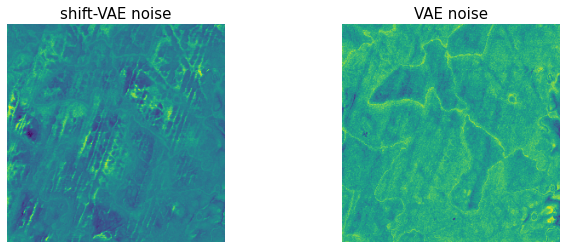

In [ ]:
noise_vae_map = np.array(noise_vae).reshape(256,256)          #reshape to map size
noise_svae_map = np.array(noise_svae).reshape(256,256)        #reshape to map size

f, (ax1, ax2) = plt.subplots(1,2, figsize = (11,4))
ax1.imshow(noise_svae_map)
ax1.axis('off')
ax1.set_title('shift-VAE noise', fontsize = 15)           

ax2.imshow(noise_vae_map)
ax2.axis('off')
ax2.set_title('VAE noise', fontsize = 15)         

# **Analysis BEPS PTO data**

*    We further extend the shift-VAE analyses to a spectroscopic BEPS data on a PTO sample.



Download BEPS data

In [ ]:
!gdown https://drive.google.com/uc?id=1J-1IF7UzmV0TCD0Z_Rw5Vu-vdd2xxysN

Downloading...
From: https://drive.google.com/uc?id=1J-1IF7UzmV0TCD0Z_Rw5Vu-vdd2xxysN
To: /content/pto_50x50_2ndarea_0002.h5
289MB [00:01, 151MB/s]


Read BEPS data and show the data structure

In [ ]:
h5_f = h5py.File(r'pto_50x50_2ndarea_0002.h5', 'r+')

usid.hdf_utils.print_tree(h5_f)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ Bin_FFT
    ├ Bin_Frequencies
    ├ Bin_Indices
    ├ Bin_Step
    ├ Bin_Wfm_Type
    ├ Excitation_Waveform
    ├ Noise_Floor
    ├ Position_Indices
    ├ Position_Values
    ├ Raw_Data
    ├ Raw_Data-SHO_Fit_000
      --------------------
      ├ Fit
      ├ Guess
      ├ Spectroscopic_Indices
      ├ Spectroscopic_Values
    ├ Spatially_Averaged_Plot_Group_000
      ---------------------------------
      ├ Bin_Frequencies
      ├ Mean_Spectrogram
      ├ Spectroscopic_Parameter
      ├ Step_Averaged_Response
    ├ Spectroscopic_Indices
    ├ Spectroscopic_Values
    ├ UDVS
    ├ UDVS_Indices


## Show PFM Images

(-0.5, 49.5, 49.5, -0.5)

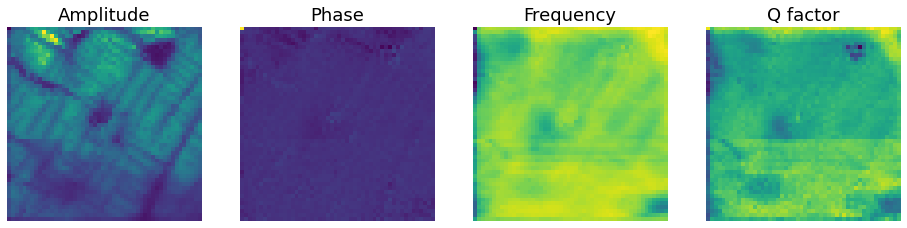

In [ ]:
amp = h5_f['Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Guess']['Amplitude [V]'].reshape(50,50,192)
pha = h5_f['Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Guess']['Phase [rad]'].reshape(50,50,192)
fre = h5_f['Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Guess']['Frequency [Hz]'].reshape(50,50,192)
q = h5_f['Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Guess']['Quality Factor'].reshape(50,50,192)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize = (16,4))

i = 1
ax1.imshow(amp[:,:,i])
ax1.set_title('Amplitude', fontsize = 18)
ax1.axis('off')
ax2.imshow(pha[:,:,i])
ax2.set_title('Phase', fontsize = 18)
ax2.axis('off')
ax3.imshow(fre[:,:,i])
ax3.set_title('Frequency', fontsize = 18)
ax3.axis('off')
ax4.imshow(q[:,:,i])
ax4.set_title('Q factor', fontsize = 18)
ax4.axis('off')

# shift-VAE analysis

Prepare train_data

In [ ]:
#read spectra data
spec = np.abs(np.array(h5_f['Measurement_000/Channel_000/Raw_Data']))

#change the data to required shape
spec1 = spec.reshape(50,50,192,60)
spec2 = spec1.reshape(50*50*192,60)

#normalize spectra
spec2 = (spec2-spec2.min())/(spec2.max()-spec2.min())

#remove 20 points, which almost is just background
s = spec2[:,20:]  

#initilize data loader
train_data = torch.tensor(s)
train_loader = pv.utils.init_dataloader(train_data.unsqueeze(1), batch_size=64)

#set dimension
in_dim = (40,)

## shift-VAE train


*   Note we provide a link to download trained weights



In [ ]:
# Initialize shift-invariant VAE
svae = pv.models.trVAE(in_dim, latent_dim=2, coord=1,
                      sampler_d="gaussian", decoder_sig=.1, sigmoid_d=False,
                      seed= 0)

# Initialize SVI trainer
trainer = pv.trainers.SVItrainer(svae)

# Train for n epochs:
for e in range(200):
    trainer.step(train_loader)
    trainer.print_statistics()

svae_BEPS = svae

Epoch: 1 Training loss: -52.8413
Epoch: 2 Training loss: -53.0695
Epoch: 3 Training loss: -53.0802
Epoch: 4 Training loss: -53.0855
Epoch: 5 Training loss: -53.0899
Epoch: 6 Training loss: -53.0919
Epoch: 7 Training loss: -53.0946
Epoch: 8 Training loss: -53.0968
Epoch: 9 Training loss: -53.0981
Epoch: 10 Training loss: -53.0990
Epoch: 11 Training loss: -53.0999
Epoch: 12 Training loss: -53.1015
Epoch: 13 Training loss: -53.1018
Epoch: 14 Training loss: -53.1029
Epoch: 15 Training loss: -53.1036
Epoch: 16 Training loss: -53.1041
Epoch: 17 Training loss: -53.1045
Epoch: 18 Training loss: -53.1055
Epoch: 19 Training loss: -53.1054
Epoch: 20 Training loss: -53.1063
Epoch: 21 Training loss: -53.1063
Epoch: 22 Training loss: -53.1064
Epoch: 23 Training loss: -53.1064
Epoch: 24 Training loss: -53.1073
Epoch: 25 Training loss: -53.1075
Epoch: 26 Training loss: -53.1078
Epoch: 27 Training loss: -53.1076
Epoch: 28 Training loss: -53.1086
Epoch: 29 Training loss: -53.1084
Epoch: 30 Training loss

Download and load trained weight

In [ ]:
!gdown https://drive.google.com/uc?id=1-6sInB9xFSCD6RBd472-mAsWUrNxYer7

svae_BEPS = pv.models.trVAE(in_dim, latent_dim=2, coord=1,
                      sampler_d="gaussian", decoder_sig=.1, sigmoid_d= False,
                      seed=0)

svae_BEPS.load_weights("/content/v2_Shift_(ss)VAE_Analysis_1DSpectra&BEPFM&BEPS_svae_BEPS.pt")

Downloading...
From: https://drive.google.com/uc?id=1-6sInB9xFSCD6RBd472-mAsWUrNxYer7
To: /content/v2_Shift_(ss)VAE_Analysis_1DSpectra&BEPFM&BEPS_svae_BEPS.pt
100% 231k/231k [00:00<00:00, 69.8MB/s]


Latent variables distribution

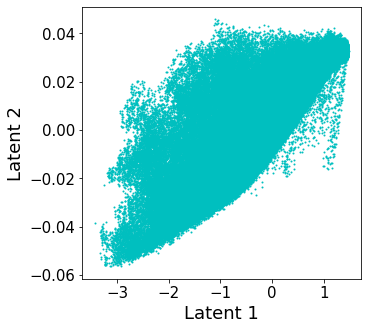

In [ ]:
z_mean, _ = svae_BEPS.encode(train_data)

f, ax = plt.subplots(figsize = (5,5))
ax.scatter(z_mean[:, -2], z_mean[:, -1], s=1, c='c')
ax.set_xlabel('Latent 1', fontsize = 18)
ax.set_ylabel('Latent 2', fontsize = 18)
ax.tick_params(labelsize = 15)
plt.show()

### Show Latent Variables as Images

(-0.5, 49.5, 49.5, -0.5)

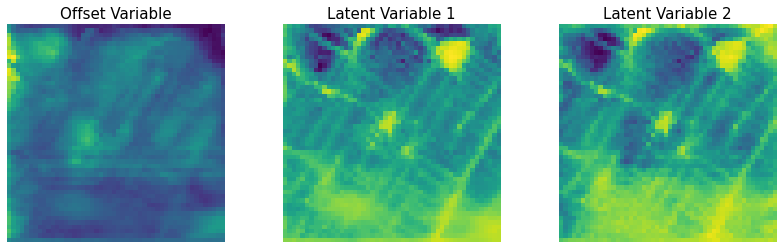

In [ ]:
z_mean, z_sd = svae_BEPS.encode(train_data)  #latent variables

svae_im0 = np.array (z_mean[:, 0]).reshape(50,50,192)   #reshape latent variables to image size
svae_im1 = np.array (z_mean[:, 1]).reshape(50,50,192)
svae_im2 = np.array (z_mean[:, 2]).reshape(50,50,192)

#plot latent variables as images
i = 60    #select a voltage step
f, (ax0, ax1, ax2) = plt.subplots(1,3,figsize = (14,4))
ax0.imshow(svae_im0[:,:,i])
ax0.set_title('Offset Variable', fontsize = 15)
ax0.axis ('off')
ax1.imshow(svae_im1[:,:,i])
ax1.set_title('Latent Variable 1', fontsize = 15)
ax1.axis ('off')
ax2.imshow(svae_im2[:,:,i])
ax2.set_title('Latent Variable 2', fontsize = 15)
ax2.axis ('off')

### shift-VAE Decode

We reconstructed BE spectra at several random pixels by shift-VAE model and corresponindg latent variables

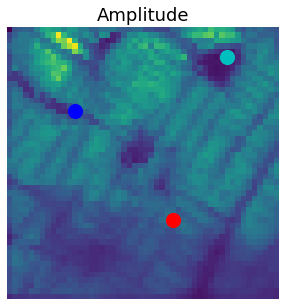

In [ ]:
#pick up some pixels
i1 = 30; j1 = 35
i2 = 12; j2 = 15
i3 = 40; j3 = 5

f, ax = plt.subplots(figsize = (5,5))
ax.imshow(amp[:,:,1])
ax.axis ('off')
ax.set_title ('Amplitude', fontsize = 18)
plt.scatter(i1,j1, s = 200, c = 'r')
plt.scatter(i2,j2, s = 200, c = 'b')
plt.scatter(i3,j3, s = 200, c = 'c')

In [ ]:
#read resonance frequency
freq = h5_f['Measurement_000/Channel_000/Spectroscopic_Values']
f = freq[0,:60]/1000    #convert to ..kHz
fc = f[20:]             #remove first 20 points

Text(0.5, 1.0, 'Corresponding raw spectra at different pixels')

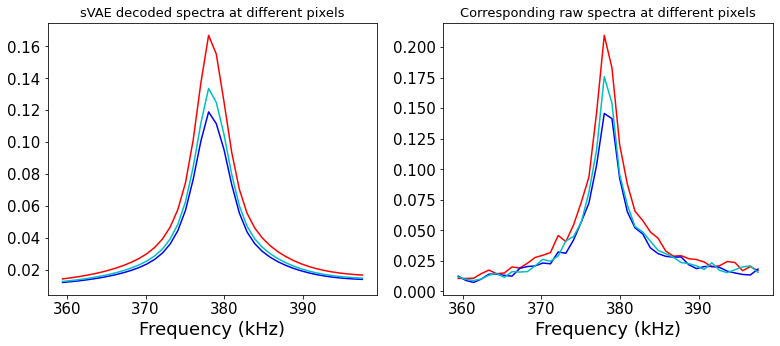

In [ ]:
#Shift-VAE decode 
k = 30
deco_svae = torch.tensor([svae_im1[i1,j1, k],svae_im2[i1,j1, k]])[None]
d1_svae=svae_BEPS.decode(deco_svae).cpu()

deco_svae = torch.tensor([svae_im1[i2,j2, k],svae_im2[i2,j2, k]])[None]
d2_svae=svae_BEPS.decode(deco_svae).cpu()

deco_svae = torch.tensor([svae_im1[i3,j3, k],svae_im2[i3,j3, k]])[None]
d3_svae=svae_BEPS.decode(deco_svae).cpu()

rawspec = np.array(train_data).reshape(50,50,192,40)

#compare the raw spectra and decoded spectra
f, (ax1, ax2) = plt.subplots(1,2, figsize = (13,5))
ax1.plot (fc, d1_svae[0], c = 'r')
ax1.plot (fc, d2_svae[0], c = 'b')
ax1.plot (fc, d3_svae[0], c = 'c')
ax1.set_xlabel('Frequency (kHz)', fontsize = 18)
ax1.tick_params(labelsize = 15)
ax1.set_title('sVAE decoded spectra at different pixels', fontsize = 13)

ax2.plot (fc, rawspec[i1, j1, k], c = 'r')
ax2.plot (fc, rawspec[i2, j2, k], c = 'b')
ax2.plot (fc, rawspec[i3, j3, k], c = 'c')
ax2.set_xlabel('Frequency (kHz)', fontsize = 18)
ax2.tick_params(labelsize = 15)
ax2.set_title('Corresponding raw spectra at different pixels', fontsize = 13)

### Plot latent variables as function of voltage

*   Since this is a spectroscopic data, we can also check the evolution of latent variables as a function of poling voltage



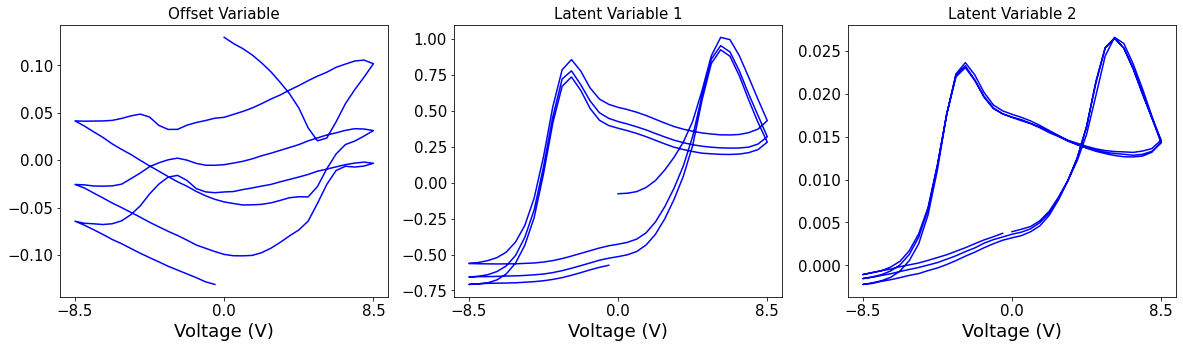

In [ ]:
spec_val = h5_f['Measurement_000/Channel_000/Raw_Data-SHO_Fit_000/Spectroscopic_Values']  #voltage

f, (ax0, ax1, ax2) = plt.subplots(1,3,figsize = (20,5))
ax0.plot(spec_val[0,], svae_im0.mean(axis = 0).mean(axis = 0), c = 'b')
ax0.set_title('Offset Variable', fontsize = 15)
ax0.set_xlabel('Voltage (V)', fontsize = 18)
ax0.tick_params(labelsize = 15)
ax0.set_xticks([-8.5, 0, 8.5]);

ax1.plot(spec_val[0,], svae_im1.mean(axis = 0).mean(axis = 0), c = 'b')
ax1.set_title('Latent Variable 1', fontsize = 15)
ax1.set_xlabel('Voltage (V)', fontsize = 18)
ax1.tick_params(labelsize = 15)
ax1.set_xticks([-8.5, 0, 8.5]);

ax2.plot(spec_val[0,], svae_im2.mean(axis = 0).mean(axis = 0), c = 'b')
ax2.set_title('Latent Variable 2', fontsize = 15)
ax2.set_xlabel('Voltage (V)', fontsize = 18)
ax2.tick_params(labelsize = 15)
ax2.set_xticks([-8.5, 0, 8.5]);